
Training Confusion Matrix:
  [[27294   138]
 [    0  3459]]

Testing Confusion Matrix:
  [[8859  257]
 [1023  158]]

Training Accuracy Score:  0.9955326794211906

Testing Accuracy Score:  0.8756919491113917

Training Precision:  0.9616346955796498

Testing Precision:  0.38072289156626504

Training Recall:  1.0

Testing Recall:  0.13378492802709568

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     27432
           1       0.96      1.00      0.98      3459

   micro avg       1.00      1.00      1.00     30891
   macro avg       0.98      1.00      0.99     30891
weighted avg       1.00      1.00      1.00     30891


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      9116
           1       0.38      0.13      0.20      1181

   micro avg       0.88      0.88      0.88     10297
   macro avg       0.64      0.55      0.

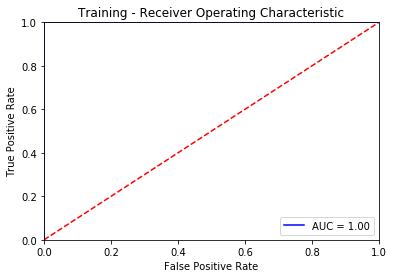

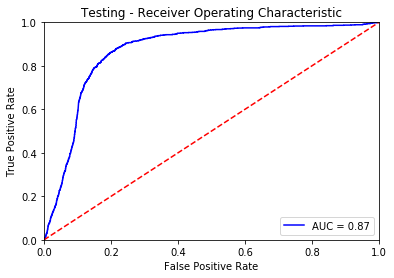

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import pickle

from src.evaluate import evaluate

df_train = pd.read_csv('./data/benchmark/benchmark_standardized_train.csv')
df_test = pd.read_csv('./data/benchmark/benchmark_standardized_test.csv')

df_train_class = pd.DataFrame(df_train['y'])
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

svm_model_final = SVC(C = 1.5, gamma = 0.05, kernel = 'rbf', class_weight='balanced', probability=True)

svm_model_final.fit(df_train_features, df_train_class.values.ravel())

predicted_train = svm_model_final.predict(df_train_features)
predicted_test = svm_model_final.predict(df_test_features)

predicted_prob_train = np.array([])
predicted_prob_test = np.array([])

predicted_prob_train = svm_model_final.predict_proba(df_train_features)
predicted_prob_test  = svm_model_final.predict_proba(df_test_features)

evaluate(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')

with open('./models/svm/benchmark_svm_standardized_model.sav', 'wb') as f:
    pickle.dump(svm_model_final, f)


Training Confusion Matrix:
  [[26481   951]
 [   16  3443]]

Testing Confusion Matrix:
  [[8534  582]
 [ 852  329]]

Training Accuracy Score:  0.9686963840600822

Testing Accuracy Score:  0.860736136738856

Training Precision:  0.7835685025034137

Testing Precision:  0.3611416026344676

Training Recall:  0.9953743856605956

Testing Recall:  0.2785774767146486

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     27432
           1       0.78      1.00      0.88      3459

   micro avg       0.97      0.97      0.97     30891
   macro avg       0.89      0.98      0.93     30891
weighted avg       0.98      0.97      0.97     30891


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      9116
           1       0.36      0.28      0.31      1181

   micro avg       0.86      0.86      0.86     10297
   macro avg       0.64      

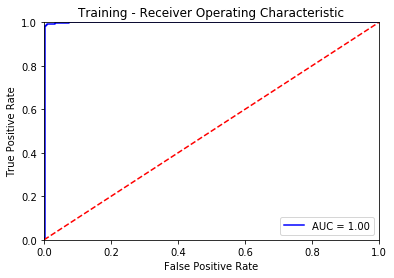

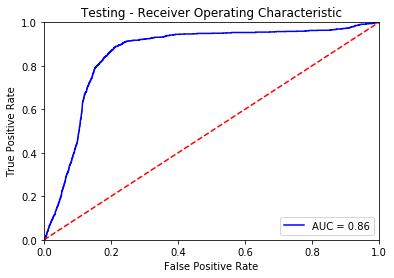

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import pickle
from sklearn.decomposition import PCA

from src.evaluate import evaluate

df_train = pd.read_csv('./data/benchmark/benchmark_standardized_train.csv')
df_test = pd.read_csv('./data/benchmark/benchmark_standardized_test.csv')

df_train_class = pd.DataFrame(df_train['y'])
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

pca_model = PCA(n_components=5)
pca_model.fit(df_train_features)
df_train_features = pd.DataFrame(pca_model.transform(df_train_features))
df_test_features = pd.DataFrame(pca_model.transform(df_test_features))

svm_model_final = SVC(C = 1.5, gamma = 0.05, kernel = 'rbf', class_weight='balanced', probability=True)

svm_model_final.fit(df_train_features, df_train_class.values.ravel())

predicted_train = svm_model_final.predict(df_train_features)
predicted_test = svm_model_final.predict(df_test_features)

predicted_prob_train = np.array([])
predicted_prob_test = np.array([])

predicted_prob_train = svm_model_final.predict_proba(df_train_features)
predicted_prob_test  = svm_model_final.predict_proba(df_test_features)

evaluate(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')

with open('./models/svm/benchmark_svm_standardized_model_pca.sav', 'wb') as f:
    pickle.dump(svm_model_final, f)